# Rainfall Prediction - Weather Forecasting

In [85]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [87]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


#### Problem statement 1

#### a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [88]:
# Checking the shape of the dataset
df.shape

(8425, 23)

In [89]:
# Checking column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [90]:
# Checking for the data types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [91]:
# Checking for the nulll values if any
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [92]:
# Checking for the unique values
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

### Feature engineering

In [93]:
df['year']=df['Date'].str.split('-').str[0]

In [94]:
df['year']

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
8420    2017
8421    2017
8422    2017
8423    2017
8424    2017
Name: year, Length: 8425, dtype: object

In [95]:
df['month']=df['Date'].str.split('-').str[1]

In [96]:
df['month']

0       12
1       12
2       12
3       12
4       12
        ..
8420    06
8421    06
8422    06
8423    06
8424    06
Name: month, Length: 8425, dtype: object

In [97]:
df['day']=df['Date'].str.split('-').str[2]

In [98]:
df['day']

0       01
1       02
2       03
3       04
4       05
        ..
8420    21
8421    22
8422    23
8423    24
8424    25
Name: day, Length: 8425, dtype: object

In [99]:
#We can drop date column now
df.drop(columns='Date',inplace =True)

In [100]:
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02


## EDA

In [101]:
# Checking the data distribution

In [102]:
# Separating the numerical values
df_numerical=df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]
    

In [103]:
df_numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [104]:
df_numerical.shape

(8425, 14)

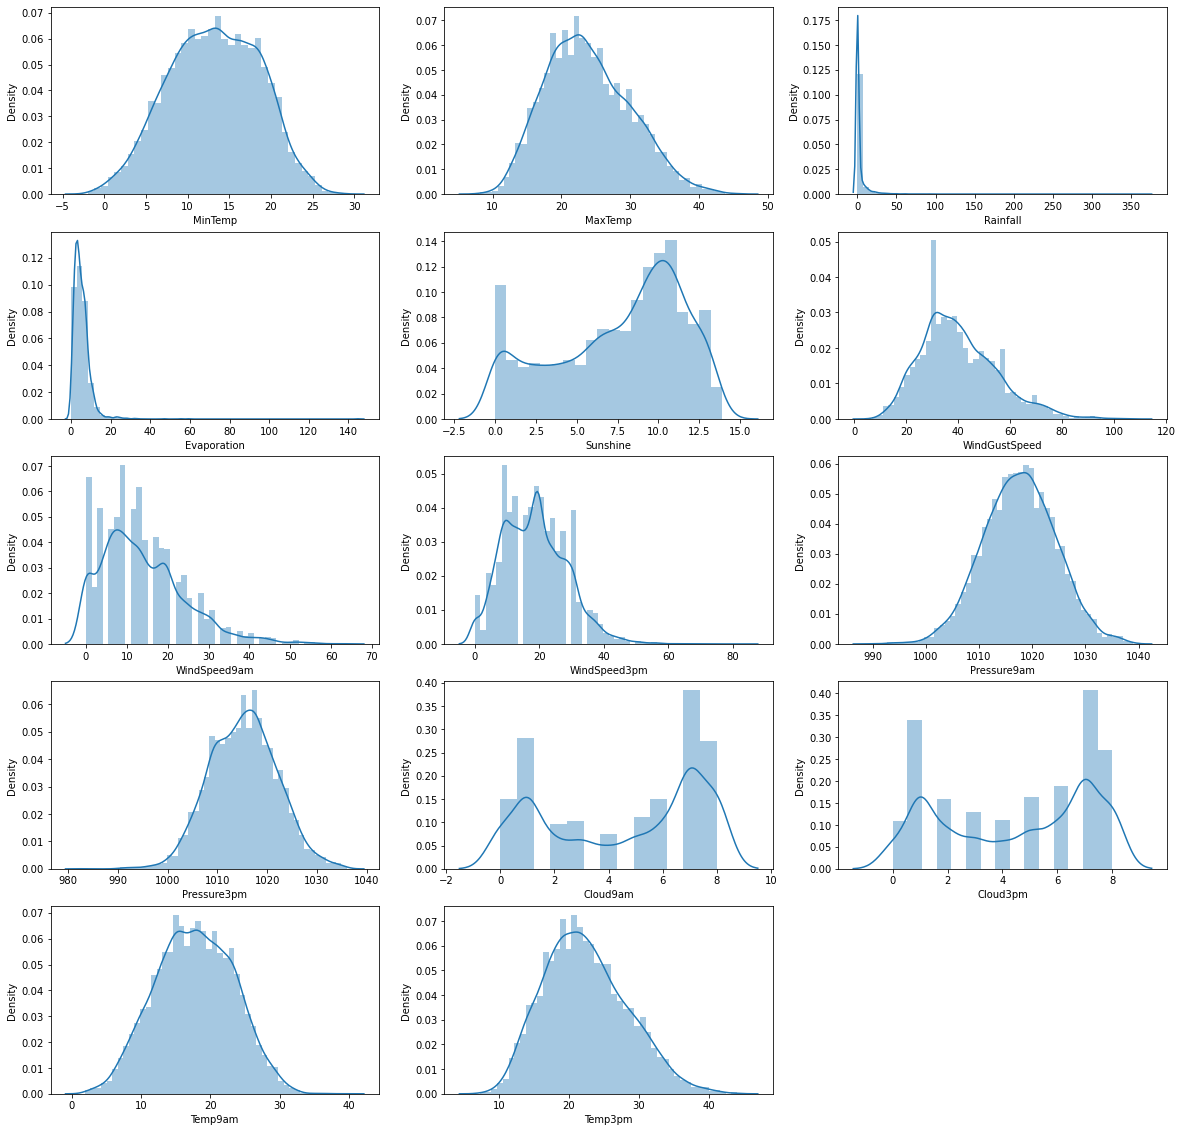

In [105]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df_numerical:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [106]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year              object
month             object
day               object
dtype: object

In [107]:
#Checking statistics 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [108]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Location'>

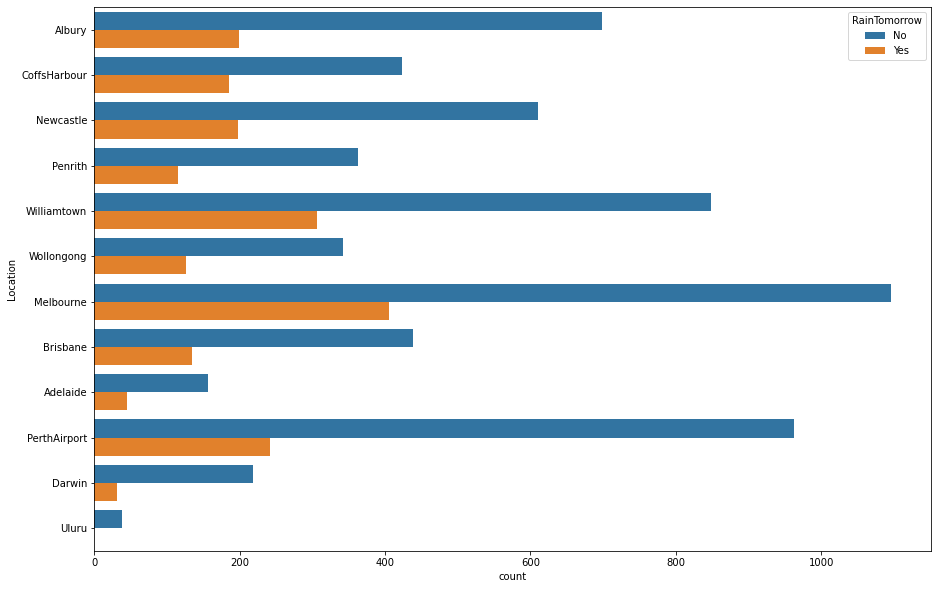

In [109]:
plt.figure(figsize=(15,10))
sns.countplot(y=df['Location'],hue=df['RainTomorrow'])

The target variable is not evenly distributed across the locations. 
The highest rainfall has been recorded from the melbourne.
The parameter for rain predictions are missing for Uluru zone

In [110]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

#### Handling null values

In [111]:
#Using mean method where the data is normally distributed
#MinTemp 
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
#MaxTemp
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
#Rainfall
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
#Evaporation
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
#Sunshine
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
#WindGustDir
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
#WindGustSpeed
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
#WindDir9am
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
#WindDir3pm
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
#WindSpeed9am
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean()) 
#WindSpeed3pm
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean()) 
#Humidity9am
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())     
#Humidity3pm
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())  
#Pressure9am
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())  
#Pressure3pm
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
#Cloud9am
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
#Cloud3pm
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
#Temp9am
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
#Temp9am
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
#RainToday
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
#RainTomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainToday'].mode()[0]) 

In [112]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [113]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

### Data Visualization

#### Univariate analysis

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

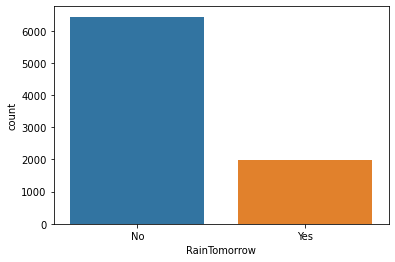

In [115]:
sns.countplot(x=df['RainTomorrow'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

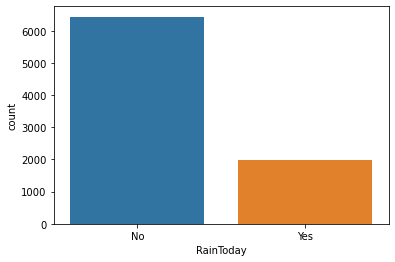

In [116]:
sns.countplot(x=df['RainToday'])

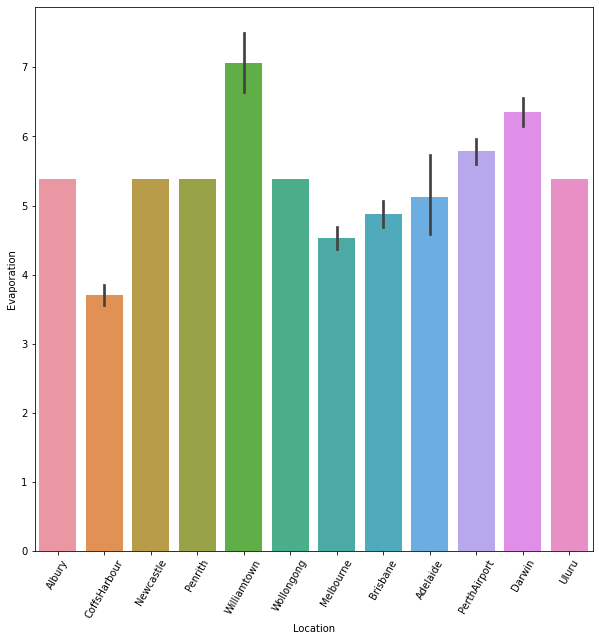

In [117]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Location'],y=df['Evaporation'])
plt.xticks(rotation=60)
plt.show()

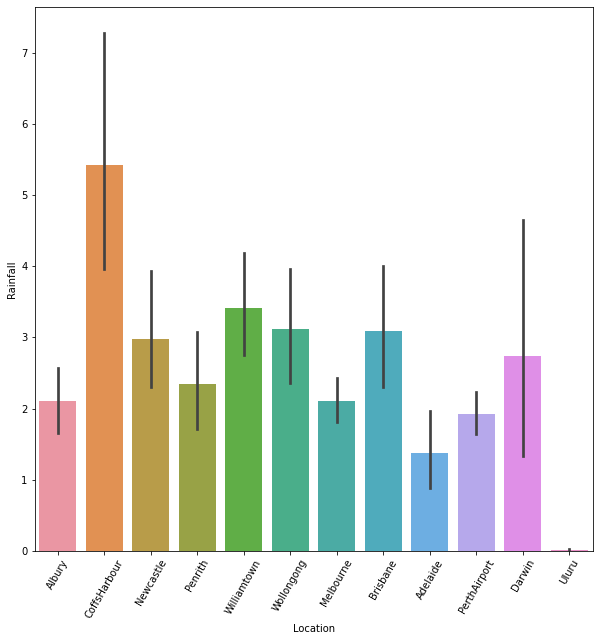

In [118]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Location'],y=df['Rainfall'])
plt.xticks(rotation=60)
plt.show()

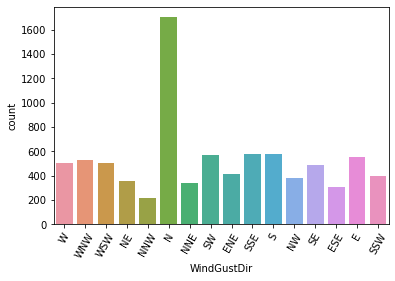

In [119]:
sns.countplot(x=df['WindGustDir'])
plt.xticks(rotation=60)
plt.show()

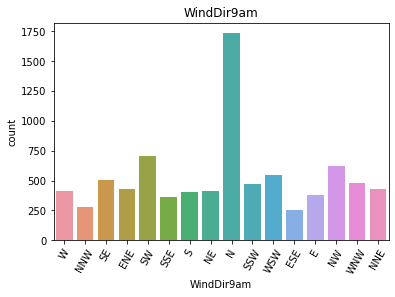

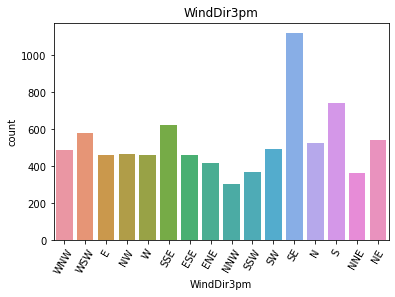

In [120]:
sns.countplot(x=df['WindDir9am'])
plt.xticks(rotation=60)
plt.title('WindDir9am')
plt.show()
sns.countplot(x=df['WindDir3pm'])
plt.xticks(rotation=60)
plt.title('WindDir3pm')
plt.show()

#### Bivariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

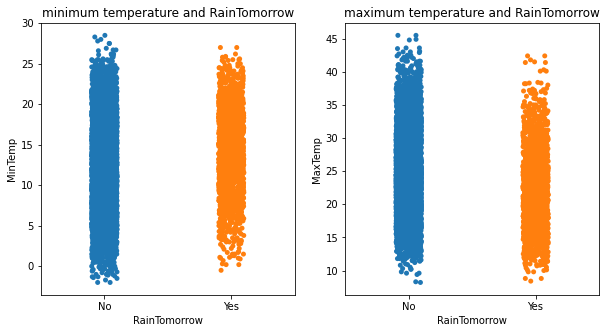

In [121]:
#checking the relation between minimum & max temperature vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='MinTemp',x='RainTomorrow',data=df)
plt.title('minimum temperature and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='MaxTemp',x='RainTomorrow',data=df)
plt.title('maximum temperature and RainTomorrow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

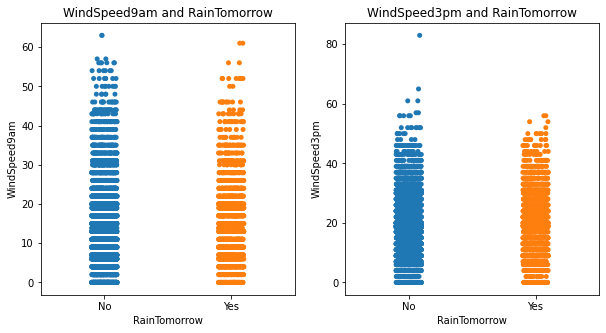

In [122]:
#checking the relation between WindSpeed vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='WindSpeed9am',x='RainTomorrow',data=df)
plt.title('WindSpeed9am and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='WindSpeed3pm',x='RainTomorrow',data=df)
plt.title('WindSpeed3pm and RainTomorrow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

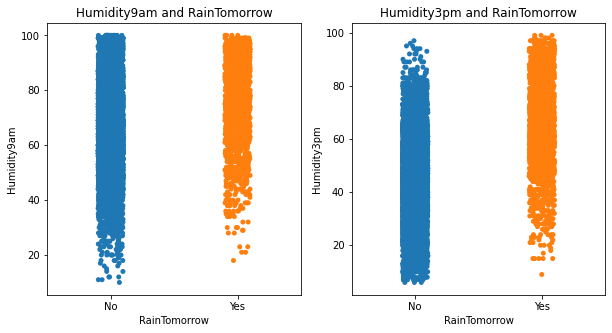

In [123]:
#checking the relation between Humidity vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='Humidity9am',x='RainTomorrow',data=df)
plt.title('Humidity9am and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='Humidity3pm',x='RainTomorrow',data=df)
plt.title('Humidity3pm and RainTomorrow')
plt.show

Humidity need to be above 20 for rain to happen. 

<function matplotlib.pyplot.show(close=None, block=None)>

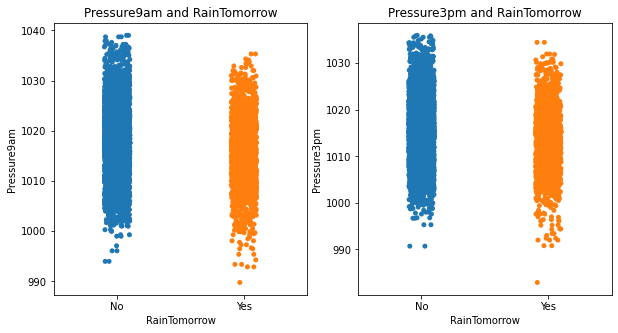

In [124]:
#checking the relation between Pressure vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='Pressure9am',x='RainTomorrow',data=df)
plt.title('Pressure9am and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='Pressure3pm',x='RainTomorrow',data=df)
plt.title('Pressure3pm and RainTomorrow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

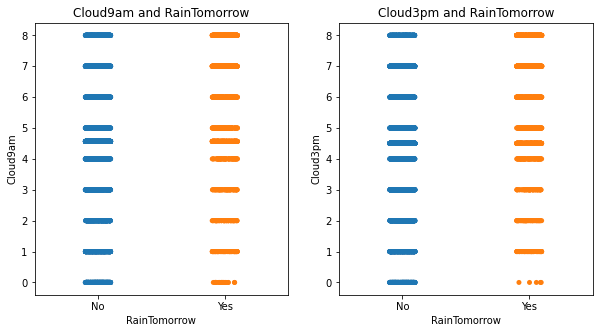

In [125]:
#checking the relation between cloud vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='Cloud9am',x='RainTomorrow',data=df)
plt.title('Cloud9am and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='Cloud3pm',x='RainTomorrow',data=df)
plt.title('Cloud3pm and RainTomorrow')
plt.show

There is no significance of raining w.r.t cloud

<function matplotlib.pyplot.show(close=None, block=None)>

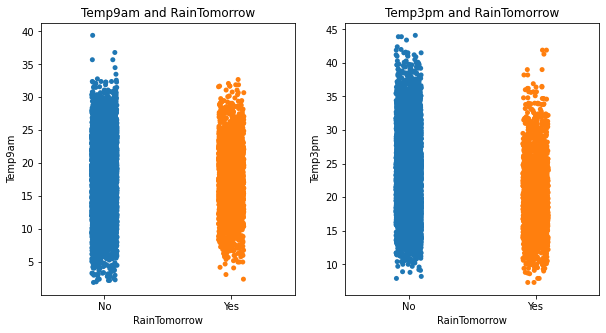

In [126]:
#checking the relation between cloud vs RainTomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.stripplot(y='Temp9am',x='RainTomorrow',data=df)
plt.title('Temp9am and RainTomorrow')
plt.subplot(1,2,2)
sns.stripplot(y='Temp3pm',x='RainTomorrow',data=df)
plt.title('Temp3pm and RainTomorrow')
plt.show

There low chance of rain if the temp is above 35 after 3pm. But there are equal chances for rainfall and clear condition for the other temp ranges

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

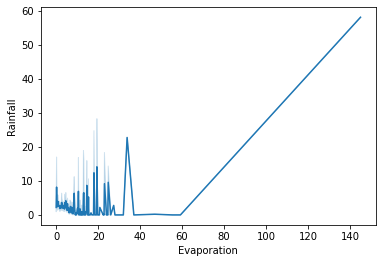

In [127]:
#checking the relation between max Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',palette="OrRd",data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

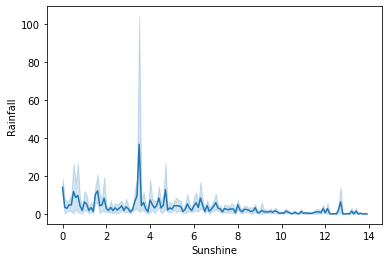

In [128]:
#Checking the relationship between Sunshine and rainfall
sns.lineplot(x='Sunshine',y='Rainfall',palette="OrRd",data=df)

Text(0.5, 1.0, 'Sunshine and Raintomorrow')

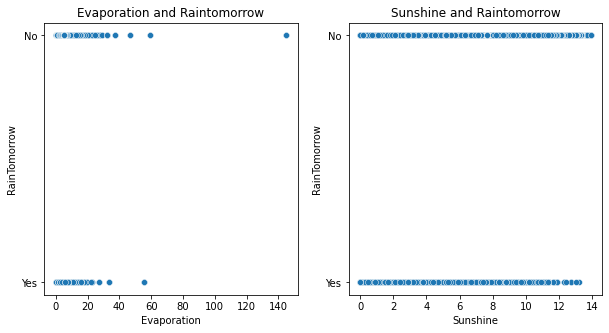

In [129]:
#checking the relation between Evaporation and Raintomorrow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Evaporation',y='RainTomorrow',data=df)
plt.title('Evaporation and Raintomorrow')
plt.subplot(1,2,2)
sns.scatterplot(x='Sunshine',y='RainTomorrow',data=df)
plt.title('Sunshine and Raintomorrow')

#### As seen from the series of analysis with different graphs there is no linear relationship

In [130]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

### Correlation

In [131]:
corr=df.corr()

In [132]:
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.085723,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520
MaxTemp,0.717522,1.000000,-0.087710,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506
Rainfall,0.085723,-0.087710,1.000000,0.024742,-0.167120,0.083374,0.048812,0.021654,0.227595,0.234938,-0.069604,-0.031268,0.183811,0.150187,-0.007351,-0.090768
Evaporation,0.254965,0.322405,0.024742,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109
Sunshine,0.056184,0.378403,-0.167120,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324
WindGustSpeed,0.230058,0.139998,0.083374,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199
WindSpeed9am,0.136872,0.013314,0.048812,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606
WindSpeed3pm,0.178349,0.088172,0.021654,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087
Humidity9am,-0.130731,-0.390976,0.227595,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401
Humidity3pm,0.079048,-0.421879,0.234938,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485


<AxesSubplot:>

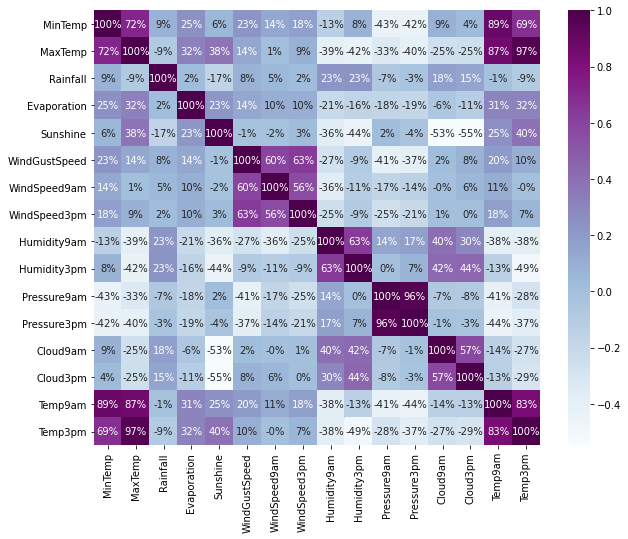

In [133]:
# Vizualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuPu")

## Outlier detection using boxplot

In [144]:
df_numerical =df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]
    

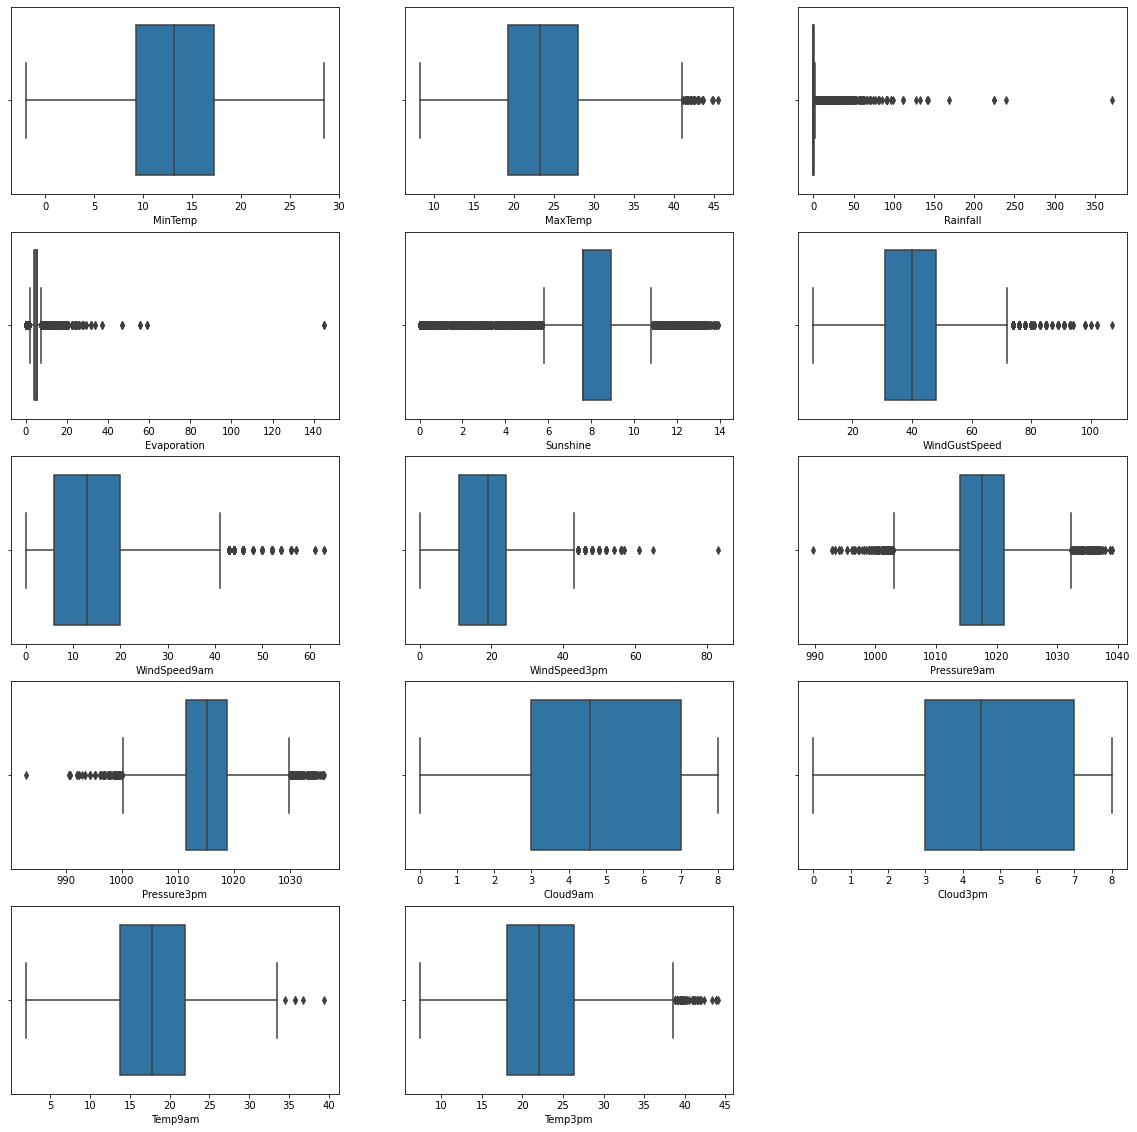

In [145]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df_numerical:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Removing outliers using z score method

In [143]:
# Dealing with outliers
from scipy.stats import zscore
z=np.abs(zscore(df_numerical))
z

array([[3.84250100e-02, 1.57008852e-01, 2.06020811e-01, ...,
        3.86285070e-16, 1.53712470e-01, 1.08138052e-01],
       [1.07698898e+00, 2.02812062e-01, 2.64164519e-01, ...,
        3.86285070e-16, 1.00217155e-01, 3.12348332e-01],
       [5.45261556e-02, 3.00945038e-01, 2.64164519e-01, ...,
        1.08867997e+00, 5.77390162e-01, 1.27334323e-01],
       ...,
       [1.44879364e+00, 4.97210991e-01, 2.64164519e-01, ...,
        3.86285070e-16, 9.38310416e-01, 6.15098528e-01],
       [1.00262804e+00, 5.13566487e-01, 2.64164519e-01, ...,
        1.08867997e+00, 4.74684357e-01, 5.98279073e-01],
       [3.17278507e-01, 2.90531973e-15, 2.64164519e-01, ...,
        1.52082997e+00, 4.92516128e-01, 2.59513150e-01]])

In [146]:
df_z=df[(z<3).all(axis=1)] # removing outliers for z score value of more than 3 

In [147]:
df.shape

(8425, 25)

In [148]:
df_z.shape

(7998, 25)

In [149]:
#percentage loss
p_loss = (8425-7998)/8425*100

In [150]:
p_loss

5.068249258160237

In [152]:
#Checking for the skewness in the dataset
df_z.skew()

MinTemp         -0.084811
MaxTemp          0.316090
Rainfall         3.521934
Evaporation      0.848348
Sunshine        -0.723504
WindGustSpeed    0.505365
WindSpeed9am     0.708414
WindSpeed3pm     0.299685
Humidity9am     -0.262037
Humidity3pm      0.118483
Pressure9am      0.021059
Pressure3pm      0.045668
Cloud9am        -0.356177
Cloud3pm        -0.266607
Temp9am         -0.033187
Temp3pm          0.335989
year             0.429397
month            0.052812
day              0.002798
dtype: float64

In [156]:
# Converting categorical objectives into numerical type
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [157]:
df_categorical=df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

In [171]:
le=LabelEncoder()
df_z["Location"]=le.fit_transform(df_z["Location"])
df_z["WindGustDir"]=le.fit_transform(df_z["WindGustDir"])
df_z["WindDir9am"]=le.fit_transform(df_z["WindDir9am"])
df_z["WindDir3pm"]=le.fit_transform(df_z["WindDir3pm"])
df_z["RainToday"]=le.fit_transform(df_z["RainToday"])
df_z["RainTomorrow"]=le.fit_transform(df_z["RainTomorrow"])

In [159]:
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,01
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,02


In [172]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7998 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7998 non-null   int32  
 1   MinTemp        7998 non-null   float64
 2   MaxTemp        7998 non-null   float64
 3   Rainfall       7998 non-null   float64
 4   Evaporation    7998 non-null   float64
 5   Sunshine       7998 non-null   float64
 6   WindGustDir    7998 non-null   int32  
 7   WindGustSpeed  7998 non-null   float64
 8   WindDir9am     7998 non-null   int32  
 9   WindDir3pm     7998 non-null   int32  
 10  WindSpeed9am   7998 non-null   float64
 11  WindSpeed3pm   7998 non-null   float64
 12  Humidity9am    7998 non-null   float64
 13  Humidity3pm    7998 non-null   float64
 14  Pressure9am    7998 non-null   float64
 15  Pressure3pm    7998 non-null   float64
 16  Cloud9am       7998 non-null   float64
 17  Cloud3pm       7998 non-null   float64
 18  Temp9am 

In [173]:
df_z['year']=df_z['year'].astype(int)
df_z['month']=df_z['month'].astype(int)
df_z['day']=df_z['day'].astype(int)

Thus we have converted all the categorical data into numerical type

# Feature selection

In [174]:
x = df_z.drop("RainTomorrow", axis=1)
y =df_z["RainTomorrow"]

In [175]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,2008,12,1
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,2008,12,2
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,2008,12,3
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,2008,12,4
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,2017,6,21
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,2017,6,22
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,2017,6,23
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,2017,6,24


In [154]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [176]:
x=power_transform(x,method="yeo-johnson")
x

array([[-1.56619954,  0.05922804, -0.07773573, ..., -1.66829213,
         1.52311261, -1.88551095],
       [-1.56619954, -1.05825633,  0.28449811, ..., -1.66829213,
         1.52311261, -1.70304598],
       [-1.56619954, -0.03347999,  0.38016955, ..., -1.66829213,
         1.52311261, -1.53659827],
       ...,
       [ 1.01637889, -1.43385627,  0.56781458, ...,  1.99936546,
        -0.04814857,  0.83576342],
       [ 1.01637889, -0.9833619 ,  0.58323719, ...,  1.99936546,
        -0.04814857,  0.93413833],
       [ 1.01637889,  0.33698185,  0.08262201, ...,  1.99936546,
        -0.04814857,  1.03145748]])

In [177]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [178]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.56619954,  0.05922804, -0.07773573, ..., -1.66819749,
         1.52311261, -1.88551095],
       [-1.56619954, -1.05825633,  0.28449811, ..., -1.66819749,
         1.52311261, -1.70304598],
       [-1.56619954, -0.03347999,  0.38016955, ..., -1.66819749,
         1.52311261, -1.53659827],
       ...,
       [ 1.01637889, -1.43385627,  0.56781458, ...,  1.99946011,
        -0.04814857,  0.83576342],
       [ 1.01637889, -0.9833619 ,  0.58323719, ...,  1.99946011,
        -0.04814857,  0.93413833],
       [ 1.01637889,  0.33698185,  0.08262201, ...,  1.99946011,
        -0.04814857,  1.03145748]])

# Model Building

In [179]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [180]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=56)

In [181]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.8415
[[1385  149]
 [ 168  298]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1534
           1       0.67      0.64      0.65       466

    accuracy                           0.84      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.84      0.84      0.84      2000

cross val score= 82.49445371142619


In [182]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.836
confusion matrix= [[1470   64]
 [ 264  202]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1534
           1       0.76      0.43      0.55       466

    accuracy                           0.84      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.83      0.84      0.82      2000

cross val score= 85.0283708646094


In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predrfc))
print("confusion matrix=",confusion_matrix(y_test,predrfc))
print("classification report=",classification_report(y_test,predrfc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8885
confusion matrix= [[1496   38]
 [ 185  281]]
classification report=               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1534
           1       0.88      0.60      0.72       466

    accuracy                           0.89      2000
   macro avg       0.89      0.79      0.82      2000
weighted avg       0.89      0.89      0.88      2000

cross val score= 87.89617737003057


In [186]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgbc))
print("confusion matrix=",confusion_matrix(y_test,predgbc))
print("classification report=",classification_report(y_test,predgbc))
print("cross val score=",(cvscore*100))

accuracy score= 0.851
confusion matrix= [[1475   59]
 [ 239  227]]
classification report=               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1534
           1       0.79      0.49      0.60       466

    accuracy                           0.85      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.84      0.85      0.84      2000

cross val score= 84.89500973033083


In [185]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
cvscore=cross_val_score(ExtraTreesClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predetc))
print("confusion matrix=",confusion_matrix(y_test,predetc))
print("classification report=",classification_report(y_test,predetc))
print("cross val score=",(cvscore*100))

accuracy score= 0.882
confusion matrix= [[1498   36]
 [ 200  266]]
classification report=               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1534
           1       0.88      0.57      0.69       466

    accuracy                           0.88      2000
   macro avg       0.88      0.77      0.81      2000
weighted avg       0.88      0.88      0.87      2000

cross val score= 87.37932999721991


In [187]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predlr))
print("confusion matrix=",confusion_matrix(y_test,predlr))
print("classification report=",classification_report(y_test,predlr))
print("cross val score=",(cvscore*100))

accuracy score= 0.8355
confusion matrix= [[1453   81]
 [ 248  218]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1534
           1       0.73      0.47      0.57       466

    accuracy                           0.84      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.83      0.84      0.82      2000

cross val score= 83.41114817903808


In [188]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknc))
print("confusion matrix=",confusion_matrix(y_test,predknc))
print("classification report=",classification_report(y_test,predknc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8195
confusion matrix= [[1435   99]
 [ 262  204]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1534
           1       0.67      0.44      0.53       466

    accuracy                           0.82      2000
   macro avg       0.76      0.69      0.71      2000
weighted avg       0.81      0.82      0.80      2000

cross val score= 83.41114817903808


# The accuracy score is 88 %

In [189]:
# Saving the model

#saving the file
import pickle
filename="income_prediction.pkl"
pickle.dump(rfc,open(filename,"wb"))